## Import Libraries

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

### Import Data

In [2]:
df = pd.read_csv(r"C:\Users\akash\OneDrive\Desktop\Python\Machine Learning---- Python\Logistics Regression\xAPI-Edu-Data.csv")
df

gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
0        M          KW       KuwaIT    lowerlevel    G-04         A   
1        M          KW       KuwaIT    lowerlevel    G-04         A   
2        M          KW       KuwaIT    lowerlevel    G-04         A   
3        M          KW       KuwaIT    lowerlevel    G-04         A   
4        M          KW       KuwaIT    lowerlevel    G-04         A   
..     ...         ...          ...           ...     ...       ...   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   
476      F      Jordan       Jordan  MiddleSchool    G-08         A   
477      F      Jordan       Jordan  MiddleSchool    G-08         A   
478      F      Jordan       Jordan  MiddleSchool    G-08         A   
479      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
0           IT        F   Father           15                16   
1           IT        F   Father           20                20   
2           IT        F   Father           10                 7   
3           IT        F   Father           30                25   
4           IT        F   Father           40                50   
..         ...      ...      ...          ...               ...   
475  Chemistry        S   Father            5                 4   
476    Geology        F   Father           50                77   
477    Geology        S   Father           55                74   
478    History        F   Father           30                17   
479    History        S   Father           35                14   

     AnnouncementsView  Discussion ParentAnsweringSurvey  \
0                    2          20                   Yes   
1                    3          25                   Yes   
2                    0          30                    No   
3                    5          35                    No   
4                   12          50                    No   
..                 ...         ...                   ...   
475                  5           8                    No   
476                 14          28                    No   
477                 25          29                    No   
478                 14          57                    No   
479                 23          62                    No   

    ParentschoolSatisfaction StudentAbsenceDays Class  
0                       Good            Under-7     M  
1                       Good            Under-7     M  
2                        Bad            Above-7     L  
3                        Bad            Above-7     L  
4                        Bad            Above-7     M  
..                       ...                ...   ...  
475                      Bad            Above-7     L  
476                      Bad            Under-7     M  
477                      Bad            Under-7     M  
478                      Bad            Above-7     L  
479                      Bad            Above-7     L  

[480 rows x 17 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
df.describe()

raisedhands  VisITedResources  AnnouncementsView  Discussion
count   480.000000        480.000000         480.000000  480.000000
mean     46.775000         54.797917          37.918750   43.283333
std      30.779223         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.750000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     100.000000         99.000000          98.000000   99.000000

### Checking Null Values

In [5]:
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

### Checking Outliers

<AxesSubplot:>

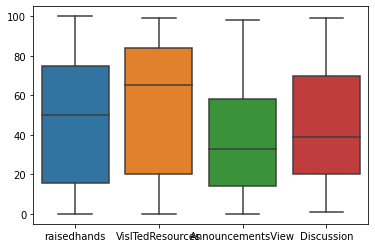

In [6]:
sns.boxplot(data = df)

In [7]:
df.head()

gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Good   
1          25                   Yes                     Good   
2          30                    No                      Bad   
3          35                    No                      Bad   
4          50                    No                      Bad   

  StudentAbsenceDays Class  
0            Under-7     M  
1            Under-7     M  
2            Above-7     L  
3            Above-7     L  
4            Above-7     M

### Que 1. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

In [ ]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class', data=data, ax=axarr[0,0], order=['L','M','H'])
sns.countplot(x='gender', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='StageID', data=data, ax=axarr[1,0])
sns.countplot(x='Semester', data=data, ax=axarr[1,1])

<AxesSubplot:xlabel='gender', ylabel='count'>

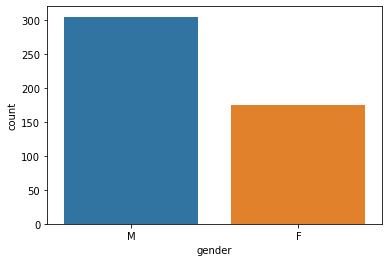

In [10]:
sns.countplot(x = 'gender', data = df)

#### There are more number of Male students than Female

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

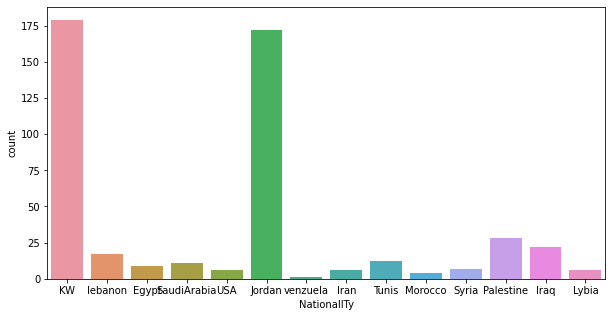

In [23]:
fig, axarr  = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x = 'NationalITy' , data = df)

#### Kuwait and Jorden these countries are in the middle east perhaps this explains the gender disparity.

<AxesSubplot:xlabel='StageID', ylabel='count'>

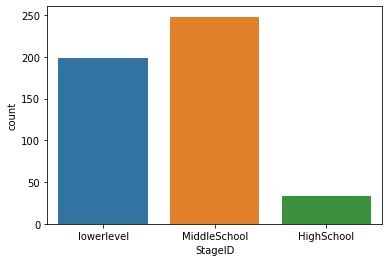

In [13]:
sns.countplot(x = 'StageID' , data = df)

#### There are high number of students from the middle school and lower level schools.

<AxesSubplot:xlabel='Topic', ylabel='count'>

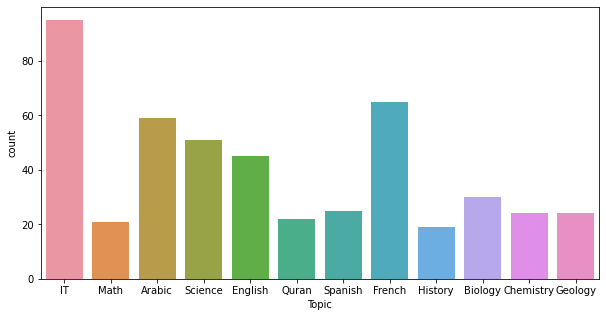

In [26]:
fig, axarr  = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x = 'Topic' , data = df)

#### The priority of topics choosen by students are IT and French. These two topics choosen by students are in more numbers.

<AxesSubplot:xlabel='Semester', ylabel='count'>

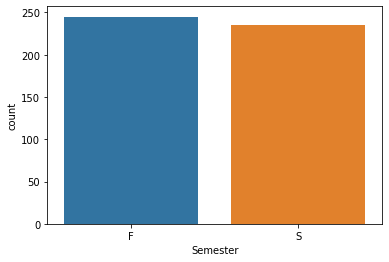

In [25]:
sns.countplot(x = 'Semester' , data = df)

#### The number of students are appearing for the first semester exam is more as compared to second semester.

### Que 2. Look at some categorical features in relation to each other, to see what insights could be possibly read?

<AxesSubplot:xlabel='gender', ylabel='count'>

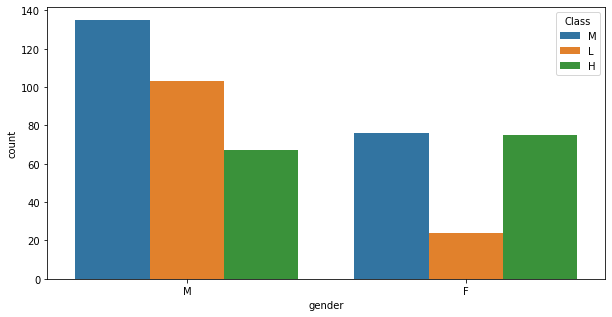

In [27]:
fig, axarr  = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x='gender', hue='Class', data = df)

#### Girls seem to have performed better than boys.

<AxesSubplot:xlabel='Relation', ylabel='count'>

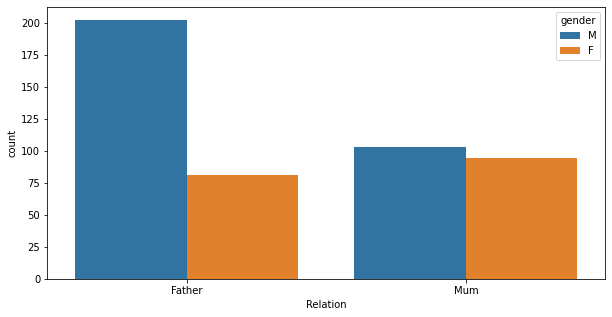

In [34]:
fig, axarr  = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x='Relation', hue='gender', data = df)

#### In the case of girls, mothers seem to be more interested in their education than fathers, and in the case of boys father seem to be more interested in their education.

<AxesSubplot:xlabel='ParentAnsweringSurvey', ylabel='count'>

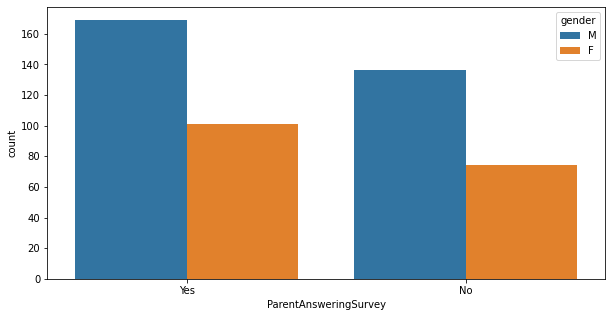

In [35]:
fig, axarr  = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x='ParentAnsweringSurvey', hue='gender', data = df)

<AxesSubplot:xlabel='StudentAbsenceDays', ylabel='count'>

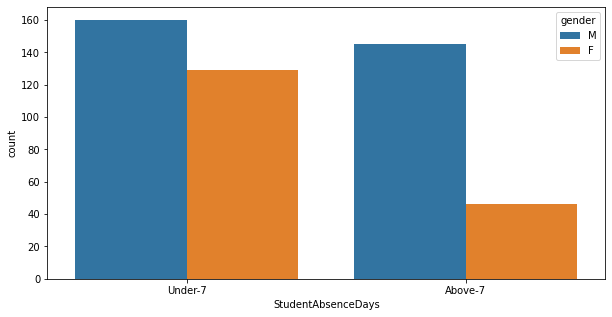

In [36]:
fig, axarr  = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x='StudentAbsenceDays', hue='gender', data = df)

#### Girls had much better attendance than boys.

<AxesSubplot:xlabel='Topic', ylabel='count'>

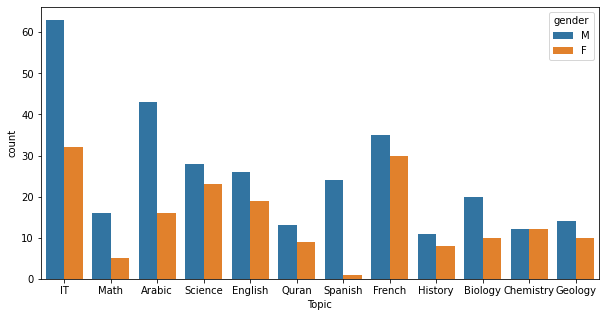

In [33]:
fig, axarr  = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x='Topic', hue='gender', data = df)

#### No apparent gender bias when it comes to subject/topic choices, we cannot conclude that girls performed better because they perhaps took less technical subjects.

### Que 3. Visualize categorical variables with numerical variables and give conclusions?

In [ ]:
fig, axarr  = plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=data, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=data, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=axarr[1,1])

<AxesSubplot:xlabel='Class', ylabel='VisITedResources'>

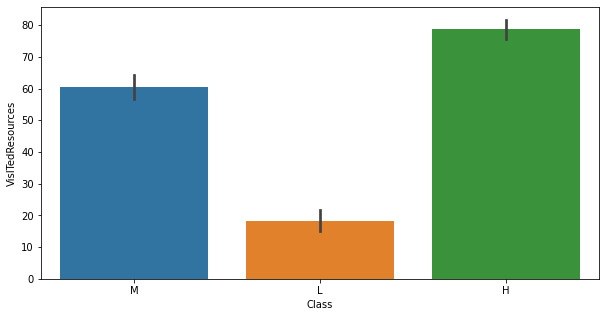

In [39]:
fig = plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='Class', y='VisITedResources', data = df)

#### Here we can say that low class students are going to school or college very few days.

<AxesSubplot:xlabel='Class', ylabel='AnnouncementsView'>

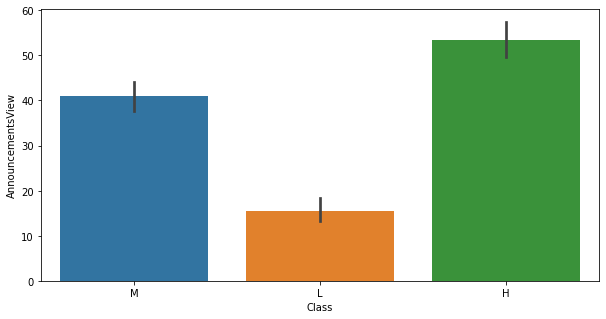

In [40]:
fig = plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='Class', y='AnnouncementsView', data = df)

#### Here we can say that there is more number of high class students see the announcement made by school.

<AxesSubplot:xlabel='Class', ylabel='raisedhands'>

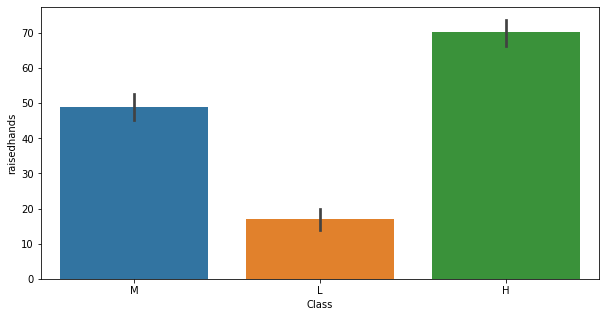

In [41]:
fig = plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='Class', y='raisedhands', data = df)

#### Here high class students are giving or raising hands in higher order than middle and lower class.

<AxesSubplot:xlabel='gender', ylabel='Discussion'>

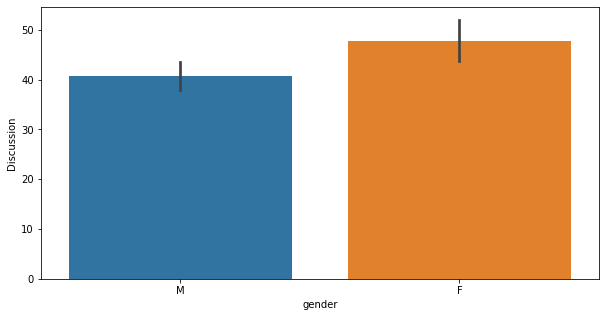

In [45]:
fig = plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='gender', y='Discussion', data = df)

#### Here we say that female students are doing more discussion with teachers as compared to male students.

<AxesSubplot:xlabel='Semester', ylabel='VisITedResources'>

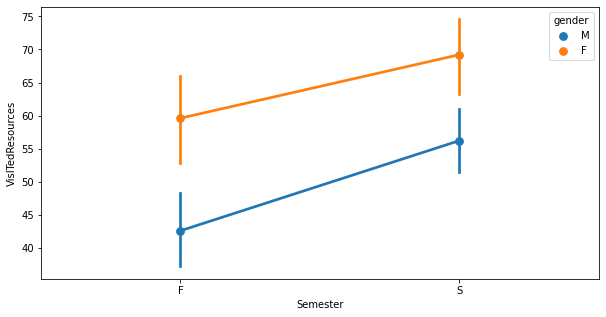

In [47]:
fig = plt.subplots(1, 1,figsize=(10,5))
sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data = df)

<AxesSubplot:xlabel='Semester', ylabel='AnnouncementsView'>

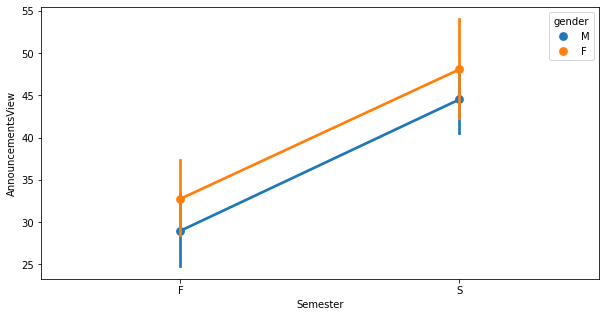

In [44]:
fig = plt.subplots(1, 1,figsize=(10,5))
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data = df)

#### In the case of both visiting resources and viewing announcements, students were more vigilant in the second semester, perhaps that last minute need to boost your final grade

### Que 4. From the above result, what are the factors that leads to get low grades of the students?

* Gender comparison cannot completely explain low level grades.
* As it can be seen in bar plot Jordan is seventh country with average 2.09 so 'Jordan' has positive impact on these two students actually.
* Having relation with mum has positive effect on these students.
* These two students are under the average of discussion. Therefore, not participating in discussion groups can be important reason to get low grades.
* Their absence days are above seven which resulted in low grades.

### Que 5. Build classification model and present it's classification report ?

In [48]:
df.head()

gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Good   
1          25                   Yes                     Good   
2          30                    No                      Bad   
3          35                    No                      Bad   
4          50                    No                      Bad   

  StudentAbsenceDays Class  
0            Under-7     M  
1            Under-7     M  
2            Above-7     L  
3            Above-7     L  
4            Above-7     M

In [50]:
import plotly.express as px

fig = px.pie(df,names='Class',color='Class',
             color_discrete_map={'M':'red',
                                 'H':'green',
                                 'L':'blue'})
fig.show()

In [51]:
df_L= df[df["Class"] == "L"]  # 1869

df_L

gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
2        M          KW       KuwaIT    lowerlevel    G-04         A   
3        M          KW       KuwaIT    lowerlevel    G-04         A   
6        M          KW       KuwaIT  MiddleSchool    G-07         A   
12       M          KW       KuwaIT    lowerlevel    G-04         A   
13       M     lebanon      lebanon  MiddleSchool    G-08         A   
..     ...         ...          ...           ...     ...       ...   
469      F      Jordan       Jordan  MiddleSchool    G-08         A   
474      F      Jordan       Jordan  MiddleSchool    G-08         A   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   
478      F      Jordan       Jordan  MiddleSchool    G-08         A   
479      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
2           IT        F   Father           10                 7   
3           IT        F   Father           30                25   
6         Math        F   Father           35                12   
12          IT        F   Father            5                 1   
13        Math        F   Father           20                14   
..         ...      ...      ...          ...               ...   
469  Chemistry        S   Father            9                 6   
474  Chemistry        F   Father            2                 7   
475  Chemistry        S   Father            5                 4   
478    History        F   Father           30                17   
479    History        S   Father           35                14   

     AnnouncementsView  Discussion ParentAnsweringSurvey  \
2                    0          30                    No   
3                    5          35                    No   
6                    0          17                    No   
12                   0          11                    No   
13                  12          19                    No   
..                 ...         ...                   ...   
469                 15          85                    No   
474                  4           8                    No   
475                  5           8                    No   
478                 14          57                    No   
479                 23          62                    No   

    ParentschoolSatisfaction StudentAbsenceDays Class  
2                        Bad            Above-7     L  
3                        Bad            Above-7     L  
6                        Bad            Above-7     L  
12                       Bad            Above-7     L  
13                       Bad            Above-7     L  
..                       ...                ...   ...  
469                      Bad            Above-7     L  
474                      Bad            Above-7     L  
475                      Bad            Above-7     L  
478                      Bad            Above-7     L  
479                      Bad            Above-7     L  

[127 rows x 17 columns]

In [52]:
fig = px.sunburst(df_L, path=["gender",'SectionID','Semester',
                                    'Relation','ParentschoolSatisfaction','StudentAbsenceDays'])
fig.show()

### Breaking The Data Into Two Parts
* Quantitative Variable
* Qualitative Variable

In [53]:
df.select_dtypes(include=[np.number]).columns.tolist()

['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

In [54]:
df[df.select_dtypes(include=['object']).columns.tolist()]

gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
0        M          KW       KuwaIT    lowerlevel    G-04         A   
1        M          KW       KuwaIT    lowerlevel    G-04         A   
2        M          KW       KuwaIT    lowerlevel    G-04         A   
3        M          KW       KuwaIT    lowerlevel    G-04         A   
4        M          KW       KuwaIT    lowerlevel    G-04         A   
..     ...         ...          ...           ...     ...       ...   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   
476      F      Jordan       Jordan  MiddleSchool    G-08         A   
477      F      Jordan       Jordan  MiddleSchool    G-08         A   
478      F      Jordan       Jordan  MiddleSchool    G-08         A   
479      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation ParentAnsweringSurvey  \
0           IT        F   Father                   Yes   
1           IT        F   Father                   Yes   
2           IT        F   Father                    No   
3           IT        F   Father                    No   
4           IT        F   Father                    No   
..         ...      ...      ...                   ...   
475  Chemistry        S   Father                    No   
476    Geology        F   Father                    No   
477    Geology        S   Father                    No   
478    History        F   Father                    No   
479    History        S   Father                    No   

    ParentschoolSatisfaction StudentAbsenceDays Class  
0                       Good            Under-7     M  
1                       Good            Under-7     M  
2                        Bad            Above-7     L  
3                        Bad            Above-7     L  
4                        Bad            Above-7     M  
..                       ...                ...   ...  
475                      Bad            Above-7     L  
476                      Bad            Under-7     M  
477                      Bad            Under-7     M  
478                      Bad            Above-7     L  
479                      Bad            Above-7     L  

[480 rows x 13 columns]

In [55]:
Quantitative_Variable = df[df.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

raisedhands  VisITedResources  AnnouncementsView  Discussion
0           15                16                  2          20
1           20                20                  3          25
2           10                 7                  0          30

In [56]:
Qualitative_Variable = df[df.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation ParentAnsweringSurvey ParentschoolSatisfaction  \
0        F   Father                   Yes                     Good   
1        F   Father                   Yes                     Good   
2        F   Father                    No                      Bad   

  StudentAbsenceDays Class  
0            Under-7     M  
1            Under-7     M  
2            Above-7     L

### Converting qualitative Variable into number

In [57]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform)
Qualitative_Variable.head()

gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
0       1            4             4        2        1          0      7   
1       1            4             4        2        1          0      7   
2       1            4             4        2        1          0      7   
3       1            4             4        2        1          0      7   
4       1            4             4        2        1          0      7   

   Semester  Relation  ParentAnsweringSurvey  ParentschoolSatisfaction  \
0         0         0                      1                         1   
1         0         0                      1                         1   
2         0         0                      0                         0   
3         0         0                      0                         0   
4         0         0                      0                         0   

   StudentAbsenceDays  Class  
0                   1      2  
1                   1      2  
2                   0      1  
3                   0      1  
4                   0      2

### Combining the data set

In [58]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
0       1            4             4        2        1          0      7   
1       1            4             4        2        1          0      7   
2       1            4             4        2        1          0      7   
3       1            4             4        2        1          0      7   
4       1            4             4        2        1          0      7   

   Semester  Relation  ParentAnsweringSurvey  ParentschoolSatisfaction  \
0         0         0                      1                         1   
1         0         0                      1                         1   
2         0         0                      0                         0   
3         0         0                      0                         0   
4         0         0                      0                         0   

   StudentAbsenceDays  Class  raisedhands  VisITedResources  \
0                   1      2           15                16   
1                   1      2           20                20   
2                   0      1           10                 7   
3                   0      1           30                25   
4                   0      2           40                50   

   AnnouncementsView  Discussion  
0                  2          20  
1                  3          25  
2                  0          30  
3                  5          35  
4                 12          50

### Data Partition

In [60]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('Class', axis = 1)
Y = Final_combined[['Class']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

### Model building
* Hypothesis
* H0 :- There is no log linear relationship between Class and all independent Variable
* Vs
* H1 :- There is log linear relationship between Class and all independent Variable
* Alpha = 0.05 (5%)

### Method 2 - Logistics Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train)

In [62]:
output.intercept_

array([-0.79069339,  0.65550179,  0.1351916 ])

In [63]:
output.coef_

array([[-1.00057806e+00, -5.37482815e-02,  7.77435402e-02,
        -1.43055662e+00, -4.30417813e-01, -7.95577385e-02,
        -5.16239944e-02, -1.46034132e-01,  6.13736660e-01,
         5.64892991e-01,  2.86753683e-01,  9.49470733e-01,
         2.69393628e-02,  1.87549910e-02,  1.43089315e-02,
         1.39666088e-02],
       [ 8.69674172e-01,  5.34461407e-02, -4.31429444e-02,
         1.28666056e+00,  3.78394659e-01,  1.90563133e-01,
        -2.62237911e-02,  4.39258907e-01,  2.80165159e-02,
        -4.65071669e-01, -1.50198778e-01, -1.11633103e+00,
        -2.96010200e-02, -2.64515195e-02, -3.32301218e-02,
        -9.79550103e-03],
       [ 1.30903886e-01,  3.02140766e-04, -3.46005959e-02,
         1.43896064e-01,  5.20231540e-02, -1.11005394e-01,
         7.78477855e-02, -2.93224775e-01, -6.41753176e-01,
        -9.98213222e-02, -1.36554904e-01,  1.66860299e-01,
         2.66165717e-03,  7.69652858e-03,  1.89211903e-02,
        -4.17110774e-03]])

In [64]:
output.n_features_in_

16

In [65]:
output.feature_names_in_

array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'raisedhands', 'VisITedResources',
       'AnnouncementsView', 'Discussion'], dtype=object)

### Predictions on Train Dataset

In [66]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
268       1            3             3        1        3          0      3   
446       1            3             3        1        5          0      5   
44        0            4             4        0        6          0      7   
164       1            3             3        2        0          1      4   
377       1            3             3        2        0          1      0   

     Semester  Relation  ParentAnsweringSurvey  ParentschoolSatisfaction  \
268         0         0                      1                         0   
446         0         1                      1                         1   
44          0         0                      0                         0   
164         1         1                      1                         1   
377         1         1                      1                         0   

     StudentAbsenceDays  raisedhands  VisITedResources  AnnouncementsView  \
268                   0           10                 8                 10   
446                   1           77                82                 74   
44                    1           33                33                 30   
164                   0           55                72                 83   
377                   0           32                82                 59   

     Discussion  Class  
268          10      2  
446          79      2  
44           90      2  
164          14      2  
377          63      2

In [80]:
train['Predicted']=output.predict(X_train)    #predict_proba   if you want but prefer predict
train.head()

gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
268       1            3             3        1        3          0      3   
446       1            3             3        1        5          0      5   
44        0            4             4        0        6          0      7   
164       1            3             3        2        0          1      4   
377       1            3             3        2        0          1      0   

     Semester  Relation  ParentAnsweringSurvey  ParentschoolSatisfaction  \
268         0         0                      1                         0   
446         0         1                      1                         1   
44          0         0                      0                         0   
164         1         1                      1                         1   
377         1         1                      1                         0   

     StudentAbsenceDays  raisedhands  VisITedResources  AnnouncementsView  \
268                   0           10                 8                 10   
446                   1           77                82                 74   
44                    1           33                33                 30   
164                   0           55                72                 83   
377                   0           32                82                 59   

     Discussion  Class  Predicted  
268          10      2          1  
446          79      2          0  
44           90      2          2  
164          14      2          2  
377          63      2          2

### Model Performance Metrics

In [81]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Class'])
matrix

array([[ 78,   0,  28],
       [  1,  85,  15],
       [ 35,  12, 130]], dtype=int64)

In [82]:
Accuracy_Train=((78+85+130)/(384)*100)
print(Accuracy_Train)

76.30208333333334


####  Accuracy of model is 76% so our model is good fit.

In [85]:
from sklearn.metrics import classification_report
print(classification_report(train['Class'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       114
           1       0.84      0.88      0.86        97
           2       0.73      0.75      0.74       173

    accuracy                           0.76       384
   macro avg       0.77      0.77      0.77       384
weighted avg       0.76      0.76      0.76       384



* Accuracy of Model is 76%,Hence Model is good Fit
* Accuracy of High class is 68%, Low class is 88% and Middle class is 75%.

### Predictions on Test Dataset

In [86]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
103       1            4             4        2        0          1      7   
134       1            4             4        1        4          0      9   
435       1            3             3        1        5          0      2   
91        1            4             4        2        0          1      7   
246       0            4             4        1        3          0     10   

     Semester  Relation  ParentAnsweringSurvey  ParentschoolSatisfaction  \
103         0         0                      0                         0   
134         1         0                      1                         1   
435         1         1                      1                         1   
91          0         0                      1                         1   
246         1         0                      1                         1   

     StudentAbsenceDays  raisedhands  VisITedResources  AnnouncementsView  \
103                   0            1                 7                  6   
134                   1           80                80                 15   
435                   0           79                88                 79   
91                    1           80                90                 55   
246                   1           80                94                 62   

     Discussion  Class  
103          10      1  
134          70      0  
435          20      2  
91           19      0  
246          77      0

In [87]:
test['Predicted']=output.predict(X_test)
test.head()

gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
103       1            4             4        2        0          1      7   
134       1            4             4        1        4          0      9   
435       1            3             3        1        5          0      2   
91        1            4             4        2        0          1      7   
246       0            4             4        1        3          0     10   

     Semester  Relation  ParentAnsweringSurvey  ParentschoolSatisfaction  \
103         0         0                      0                         0   
134         1         0                      1                         1   
435         1         1                      1                         1   
91          0         0                      1                         1   
246         1         0                      1                         1   

     StudentAbsenceDays  raisedhands  VisITedResources  AnnouncementsView  \
103                   0            1                 7                  6   
134                   1           80                80                 15   
435                   0           79                88                 79   
91                    1           80                90                 55   
246                   1           80                94                 62   

     Discussion  Class  Predicted  
103          10      1          1  
134          70      0          2  
435          20      2          2  
91           19      0          2  
246          77      0          0

### Model Performance Metrics on Test data

In [88]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Class'])
print(matrix)

[[21  0  6]
 [ 1 26  6]
 [ 6  4 26]]


In [89]:
Accuracy_test=((21+26+26)/(96)*100)
Accuracy_test

76.04166666666666

In [90]:
from sklearn.metrics import classification_report
print(classification_report(test['Class'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.87      0.83        30
           2       0.72      0.68      0.70        38

    accuracy                           0.76        96
   macro avg       0.76      0.77      0.76        96
weighted avg       0.76      0.76      0.76        96



* Accuracy of Model on Test Data is 76%,Hence Model is good Fit
* Accuracy of High class is 75%, Low class is 87% and Middle class is 68%.